# Bayesian statistics

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Bayesian Analysis of Emergency Room Patient Arrivals

This notebook aims at illustrating how to use Bayesian inference for a practical example:

- **The estimation of the average rate of patient arrivals at an emergency room per hour**


## Bayesian framework: prior, likelihood and posterior

For a Bayesian analysis, we need to define 
- a likelihood of the observed data, and
- a prior distribution over the unknown parameters defining such likelihood

Overall we have
- Data: $D = \{x_1, x_2, \ldots, x_N\}$
    - in this case, data is number of patients per hour:
        - so $x_i$ is the number of patients in the $i$-th hour, where $x_i \in \mathbb{N}$
- Model: $p(x_i|\theta)$, is a distribution of the number of patients per hour
    - We need to decide what model makes sense
    - $\theta$ are the parameters of the data-distribution
- Prior: $p(\theta)$ is the probability of the parameters before observing the data
- Likelihood: $p(D|\theta)$ is the probability of observing the data given the parameters
- Posterior: $p(\theta|D) = \frac{p(D|\theta)p(\theta)}{p(D)}$ is the probability of the parameters given the data

### Model Definition

* **Model:** We will assume that patient arrivals follow a Poisson distribution
- Why? Because it is a common distribution for count data, and it is parameterized by $\lambda$ which is the average arrival rate.
    * $X \sim Poisson(\lambda)$,
        - $X$ is the number of patient arrivals in an hour.
    * $p(x|\lambda) = \frac{\lambda^x e^{-\lambda}}{x!}$
    * Where:
        * $k$ is a specific number of arrivals.
    * $\lambda$ is the average arrival rate (our parameter of interest).
        * $E[X] = \lambda$

In [2]:
# Let us understand the Poisson distribution with an example.

# Define the Poisson distribution
poisson_lambda = 10
poisson_dist = stats.poisson(poisson_lambda)

# x-space for the Poisson distribution
x = np.arange(0, 20)

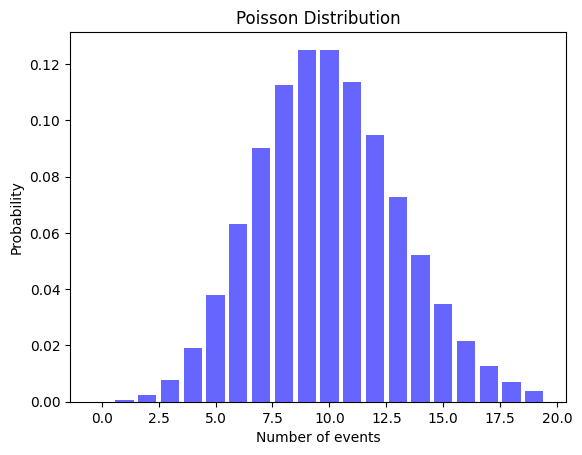

In [3]:
# Plot the probability mass function
plt.bar(
    x,
    poisson_dist.pmf(x),
    color='blue',
    alpha=0.6,
    align='center',
    label='Poisson PMF'
)
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title('Poisson Distribution')
plt.show()

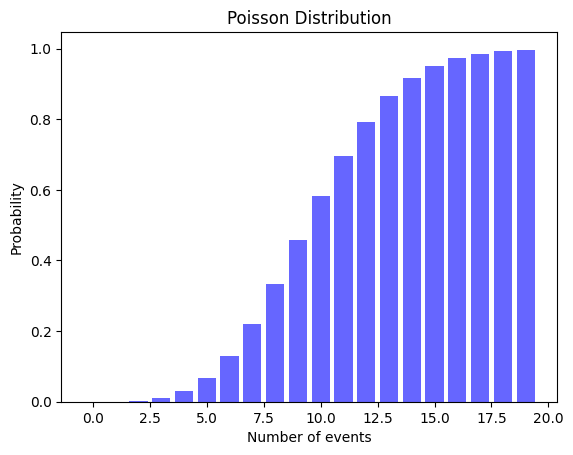

In [4]:
# Plot the CDF
plt.bar(
    x,
    poisson_dist.cdf(x),
    color='blue',
    alpha=0.6,
    align='center',
    label='Poisson CDF',
)
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title('Poisson Distribution')
plt.show()

### Prior Distribution

- We will use a Gamma distribution as our prior:
    - **Why?** Because the Gamma distribution is a conjugate prior to the Poisson distribution (i.e., we will get a Gamma distribution as our posterior).

- Mathematically,
    - $\lambda \sim \text{Gamma}(\alpha, \beta)$
    - Where:
        * $\alpha$ is the shape parameter.
        * $\beta$ is the rate parameter.


In [5]:
# Let us understand the Gamma distribution with an example.

# Define the Gamma distribution
gamma_alpha = 2
gamma_beta = 3
gamma_dist = stats.gamma(
    gamma_alpha,
    scale=1/gamma_beta
)

# x-space (theta) for the Gamma distribution
theta = np.linspace(0, 10, 1000)

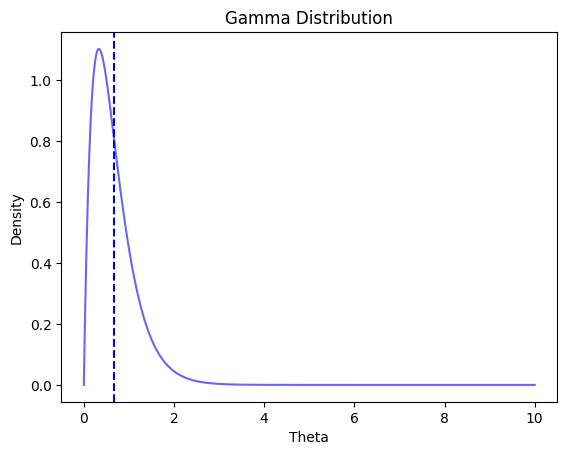

In [6]:
# Plot the probability density function
plt.plot(
    theta,
    gamma_dist.pdf(theta),
    color='blue',
    alpha=0.6,
    label='Gamma PDF'
)
# Prior mean
plt.axvline(
    x=gamma_alpha/gamma_beta,
    color='blue',
    linestyle='--',
    label='Prior Mean'
)
plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Gamma Distribution')
plt.show()

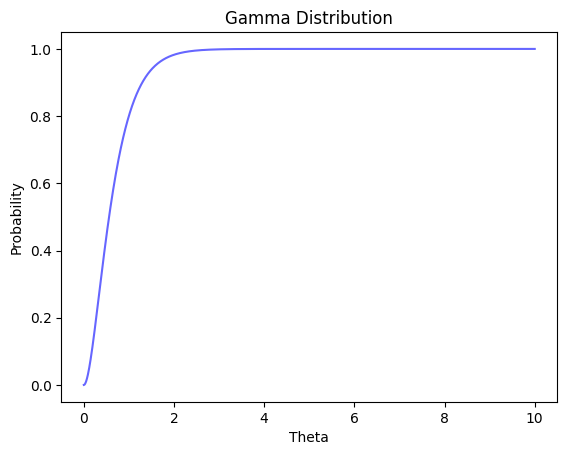

In [7]:
# Plot the CDF
plt.plot(
    theta,
    gamma_dist.cdf(theta),
    color='blue',
    alpha=0.6,
    label='Gamma CDF'
)
plt.xlabel('Theta')
plt.ylabel('Probability')
plt.title('Gamma Distribution')
plt.show()

### Numerical simulation

In [8]:
# Define the Gamma prior, based on our prior knowledge
alpha_prior = 2
beta_prior = 3
gamma_dist_prior = stats.gamma(
    alpha_prior,
    scale=1/beta_prior
)

### Data Collection

- We observe patient arrivals for $n$ hours: $x = (x_1, x_2, ..., x_n)$.




In [9]:
# Observed data, drawn from a Poisson distribution
true_lambda = 10
data = np.random.poisson(true_lambda, 1000)
n = len(data)

In [10]:
# Observed data
# Number of events
data = np.array([3, 2, 5, 4, 3])
n = len(data)
# Not drawn from a Poisson distribution
true_lambda = None

### Posterior Distribution, after observing data

- Due to Gamma-Poisson conjugacy, the posterior is also a Gamma distribution.v That is, the posterior distribution is a Gamma distribution with updated hyperparameters.
    * $\lambda | x \sim \text{Gamma}(\alpha + \sum x_i, \beta + n)$
    * Where:
        * $\sum x_i$ is the sum of observed arrivals.
        * $n$ is the number of observed hours.
        * $\alpha^\prime$ and $\beta^\prime$ are the hyperparameters of the prior Gamma distribution, which are updated to:
            - $\alpha^\prime = \alpha + \sum x_i$,
            - $\beta^\prime = \beta + n$.

In [11]:
# Compute posterior parameters
alpha_posterior = alpha_prior + np.sum(data)
beta_posterior = beta_prior + n

## Analysis and Interpretation

In [12]:
# Calculate the prior mean and variance
prior_mean = alpha_prior / beta_prior
prior_variance = alpha_prior / (beta_prior**2)

# Calculate the posterior mean and variance
posterior_mean = alpha_posterior / beta_posterior
posterior_variance = alpha_posterior / (beta_posterior**2)

# Print the results
print(f"Prior Mean: {prior_mean}")
print(f"Prior Variance: {prior_variance}")
print(f"Posterior Mean: {posterior_mean}")
print(f"Posterior Variance: {posterior_variance}")

Prior Mean: 0.6666666666666666
Prior Variance: 0.2222222222222222
Posterior Mean: 2.375
Posterior Variance: 0.296875


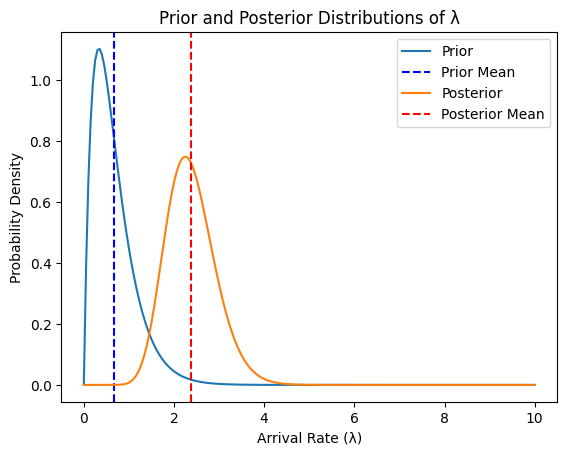

In [13]:
# Plot the prior and the posterior distributions
x = np.linspace(0, 10, 200)
# Prior pdf
plt.plot(
    x,
    stats.gamma.pdf(
        x,
        alpha_prior,
        scale=1/beta_prior
        ),
    label='Prior'
)
# Prior mean
plt.axvline(
    x=prior_mean,
    color='blue',
    linestyle='--',
    label='Prior Mean'
)
# Posterior pdf
plt.plot(
    x,
    stats.gamma.pdf(
        x,
        alpha_posterior,
        scale=1/beta_posterior
    ),
    label='Posterior'
)
# Posterior mean
plt.axvline(
    x=posterior_mean,
    color='red',
    linestyle='--',
    label='Posterior Mean'
)
plt.legend()
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Probability Density')
plt.title('Prior and Posterior Distributions of λ')
plt.show()

Probability of observing a new data point greater than 2:
Using the prior distribution: 0.017351265236664526
Using the posterior distribution: 0.7423491458937087


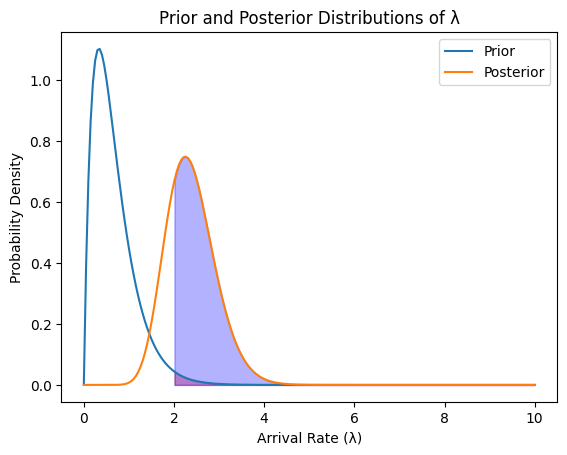

In [14]:
# Calculate the probability of observing a new data point greater than a threshold
threshold = 2

# Using the prior distribution
probability_greater_than_threshold_prior = 1 - stats.gamma.cdf(threshold, alpha_prior, scale=1/beta_prior)

# Using the posterior distribution
probability_greater_than_threshold_posterior = 1 - stats.gamma.cdf(threshold, alpha_posterior, scale=1/beta_posterior)

# Print the results
print(f"Probability of observing a new data point greater than {threshold}:")
print(f"Using the prior distribution: {probability_greater_than_threshold_prior}")
print(f"Using the posterior distribution: {probability_greater_than_threshold_posterior}")

# Plot the probability of observing a new data point greater than threshold over the prior and the posterior distributions' pdfs
x = np.linspace(0, 10, 200)
plt.plot(
    x,
    stats.gamma.pdf(
        x,
        alpha_prior,
        scale=1/beta_prior
    ),
    label='Prior'
)
plt.plot(
    x,
    stats.gamma.pdf(
        x,
        alpha_posterior,
        scale=1/beta_posterior
    ),
    label='Posterior'
)
plt.fill_between(
    x,
    0,
    stats.gamma.pdf(
        x,
        alpha_prior,
        scale=1/beta_prior
    ),
    where=(x > threshold),
    color='red',
    alpha=0.3
)
plt.fill_between(
    x,
    0,
    stats.gamma.pdf(
        x,
        alpha_posterior,
        scale=1/beta_posterior
    ),
    where=(x > threshold),
    color='blue',
    alpha=0.3
)
plt.legend()
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Probability Density')
plt.title('Prior and Posterior Distributions of λ')
plt.show()


Text(0.5, 1.0, 'Prior and Posterior Distributions of λ with 95% Credible Interval')

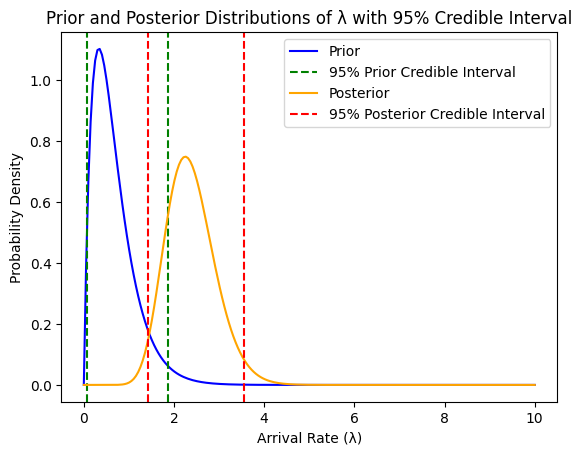

In [15]:
# Calculate the 95% credible interval
# Using the prior distribution
credible_interval_prior = stats.gamma.interval(0.95, alpha_prior, scale=1/beta_prior)
# Using the posterior distribution
credible_interval_posteior = stats.gamma.interval(0.95, alpha_posterior, scale=1/beta_posterior)

# Plot the 95% credible interval on the prior and posterior distributions
x = np.linspace(0, 10, 200)
# The prior
plt.plot(
    x,
    stats.gamma.pdf(
        x,
        alpha_prior,
        scale=1/beta_prior
        ),
    label='Prior',
    color='blue'
)
# and its credible interval
plt.axvline(
    x=credible_interval_prior[0],
    color='green',
    linestyle='--',
    label='95% Prior Credible Interval'
)
plt.axvline(
    x=credible_interval_prior[1],
    color='green',
    linestyle='--'
)
# The posterior
plt.plot(
    x,
    stats.gamma.pdf(
        x,
        alpha_posterior,
        scale=1/beta_posterior
    ),
    label='Posterior',
    color='orange'
)
# and its credible interval
plt.axvline(
    x=credible_interval_posteior[0],
    color='red',
    linestyle='--',
    label='95% Posterior Credible Interval'
)
plt.axvline(
    x=credible_interval_posteior[1],
    color='red',
    linestyle='--'
)
if true_lambda is not None:
    plt.axvline(
        x=true_lambda,
        color='black',
        linestyle='--',
        label='True λ'
    )
plt.legend()
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Probability Density')
plt.title('Prior and Posterior Distributions of λ with 95% Credible Interval')

In [16]:
# Compare true-lambda to posterior mean
if true_lambda is not None:
    print(f"True λ: {true_lambda}")
    print(f"Posterior Mean: {posterior_mean}")
    print(f"Posterior 95% Credible Interval: {credible_interval_posteior}")

## Replicate the above with

- Data from a Poisson distribution with a known rate parameter

- An uninformative prior distribution


# Bayesian analysis beyond conjugacy

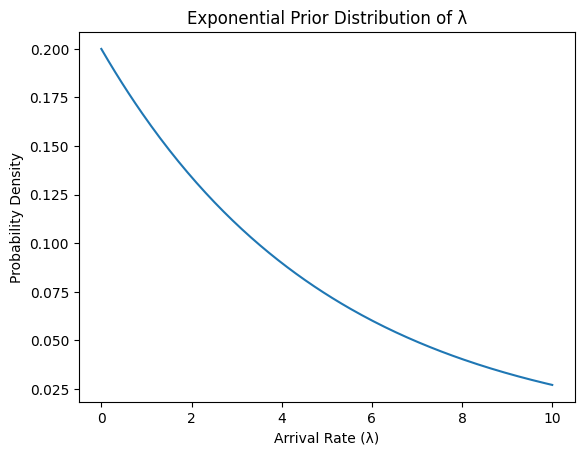

In [17]:
# Let us now change the prior: e.g., by considering an exponential distribution with a mean of 5
# Define the new prior
exp_lambda = 1/5
exp_dist = stats.expon(scale=1/exp_lambda)

# Plot the new prior
x = np.linspace(0, 10, 200)
plt.plot(
    x,
    exp_dist.pdf(x),
    label='Exponential Prior'
)
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Probability Density')
plt.title('Exponential Prior Distribution of λ')
plt.show()

## How to compute the posterior now?

### We can use Monte Carlo sampling to estimate the posterior distribution


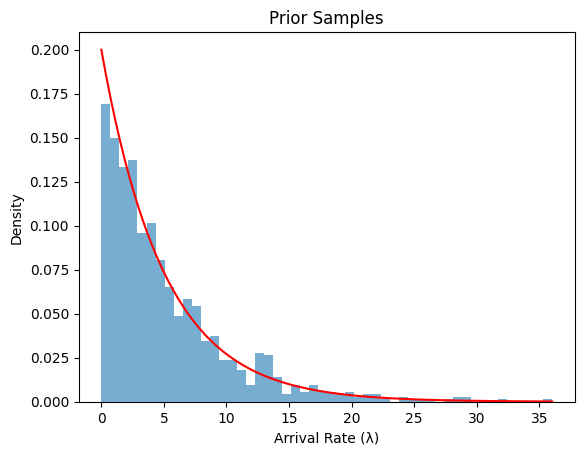

In [18]:
# Number of samples
n_samples = 1000

# Sample from the prior
prior_samples = exp_dist.rvs(n_samples)

# Plot the PDF of the prior
plt.hist(
    prior_samples,
    bins=50,
    density=True,
    alpha=0.6
)
# Plot the true prior
x = np.linspace(0, prior_samples.max(), 200)
plt.plot(
    x,
    exp_dist.pdf(x),
    color='red',
    label='Exponential Prior'
)
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Density')
plt.title('Prior Samples')
plt.show()

In [19]:
# Compute the likelihood of the data given each sample
likelihoods = np.array(
    [np.prod(stats.poisson.pmf(data, sample)) for sample in prior_samples]
)

print(likelihoods)

[1.74360914e-04 9.19987867e-05 2.36605049e-09 1.30476189e-09
 9.67699770e-06 1.41918530e-34 1.65897421e-04 7.13629519e-16
 2.06106276e-14 2.53150577e-07 8.65038381e-14 2.33783321e-44
 5.44744330e-11 2.13101548e-05 7.53790058e-16 1.60831409e-09
 4.40072810e-07 3.07899855e-06 1.29718020e-04 3.26509419e-05
 1.48515673e-05 1.39990975e-04 6.67324592e-05 9.26623182e-16
 5.90239753e-32 8.11452847e-17 2.50792992e-07 1.60883600e-12
 4.69660975e-06 2.33944636e-07 4.75686146e-05 2.47568899e-14
 1.79464003e-06 2.73955503e-12 2.08511794e-04 1.53765093e-06
 1.65183787e-06 4.79526899e-07 2.19065848e-05 6.24563184e-05
 1.30767870e-05 1.53098579e-05 8.06304362e-05 5.09353803e-05
 2.03056528e-04 7.14173869e-07 3.69111750e-05 1.11237202e-26
 2.97604711e-17 3.67371005e-07 4.20292418e-07 1.86641218e-04
 3.50310123e-11 1.72737626e-04 2.11270109e-04 1.95424038e-28
 1.77505427e-06 1.48958366e-07 1.28095783e-20 1.56331018e-04
 1.58118872e-04 1.60881701e-06 3.87368134e-05 9.90758697e-05
 1.08043312e-09 9.358342

In [20]:
# Normalize the posterior
posterior = likelihoods / np.sum(likelihoods)

# Make sure posterior_samples is a valid probability distribution
assert np.isclose(np.sum(posterior), 1)

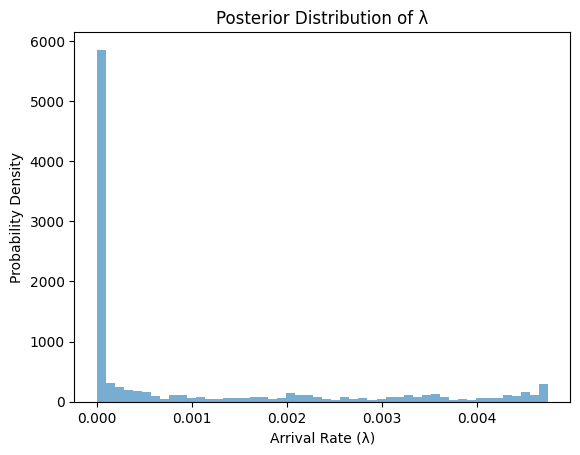

In [21]:
# Plot the PDF of the posterior samples
plt.hist(
    posterior,
    bins=50,
    density=True,
    alpha=0.6
)
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of λ')
plt.show()

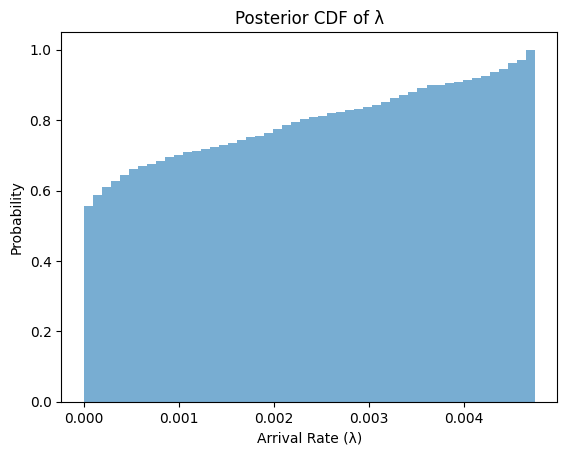

In [22]:
# Plot the CDF of the posterior samples
plt.hist(
    posterior,
    bins=50,
    density=True,
    cumulative=True,
    alpha=0.6
)
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Probability')
plt.title('Posterior CDF of λ')
plt.show()

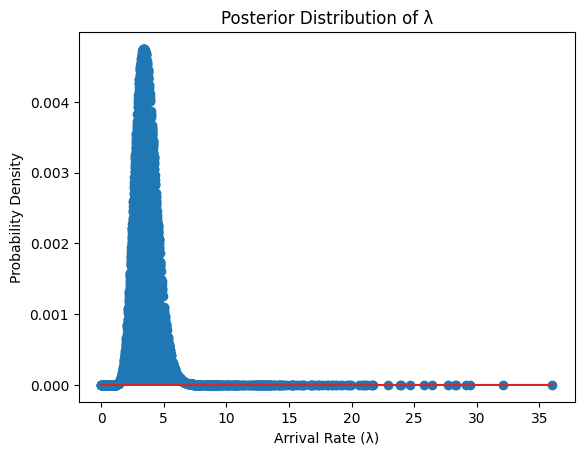

In [23]:
# Plot the posterior distribution, by using the samples and their weights, via a stem-plot
plt.stem(
    prior_samples,
    posterior,
)
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of λ')
plt.show()

In [24]:
# Calculate the posterior mean and variance
posterior_mean = np.mean(posterior)
posterior_variance = np.var(posterior)

# Print the results
print(f"Posterior Mean: {posterior_mean}")
print(f"Posterior Variance: {posterior_variance}")

Posterior Mean: 0.001
Posterior Variance: 2.331939300911158e-06


### Working on log-space to avoid numerical underflow

In [25]:
# Compute the log-likelihood of the observed data, for each prior sample
log_likelihoods = np.array(
    [np.sum(stats.poisson.logpmf(data, sample)) for sample in prior_samples]
)

# Marginal log-probability of the data
from scipy.special import logsumexp
log_weights = log_likelihoods - logsumexp(log_likelihoods)

# Make sure posterior_samples is a valid probability distribution
assert np.isclose(np.sum(np.exp(log_weights)), 1)

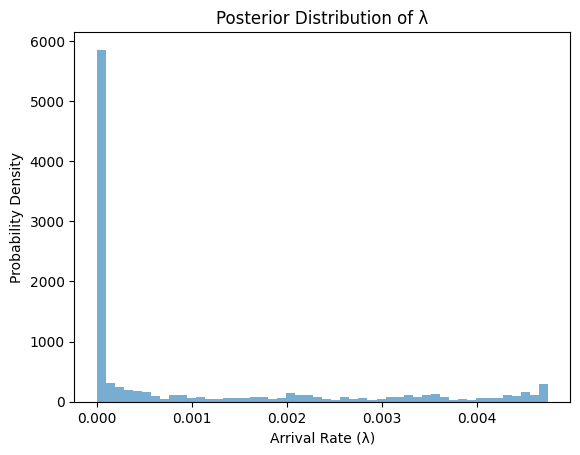

In [26]:
# Plot the PDF of the posterior samples
plt.hist(
    np.exp(log_weights),
    bins=50,
    density=True,
    alpha=0.6
)
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of λ')
plt.show()

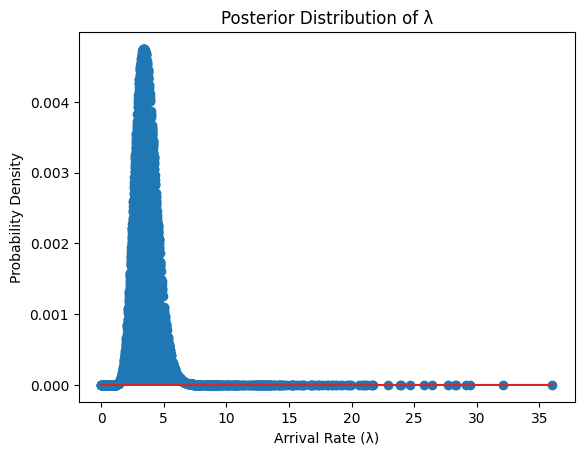

In [27]:
# Plot the posterior distribution, by using the samples and their weights (log-likelihoods), via a stem-plot
plt.stem(
    prior_samples,
    np.exp(log_weights),
)
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of λ')
plt.show()

In [28]:
# Calculate the posterior mean and variance, using the weighted samples
posterior_mean = np.sum(prior_samples * np.exp(log_weights))
posterior_variance = np.sum((prior_samples - posterior_mean)**2 * np.exp(log_weights))

# Print the results
print(f"Posterior Mean: {posterior_mean}")
print(f"Posterior Variance: {posterior_variance}")

Posterior Mean: 3.466980544726061
Posterior Variance: 0.670430916726631


## Replicate the above using a different likelihood function


In [29]:
# Define the new likelihood, e.g., a Negative Binomial distribution
likelihood_dist = stats.nbinom

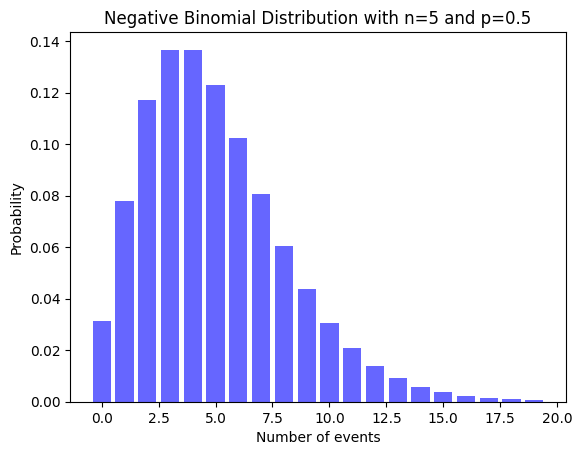

In [30]:
# Define the parameters of an example Negative Binomial distribution
negative_binomial_n = 5
negative_binomial_p = 0.5

# And plot its pdf, for illustration
x = np.arange(0, 20)
plt.bar(
    x,
    likelihood_dist.pmf(x, negative_binomial_n, negative_binomial_p),
    color='blue',
    alpha=0.6,
    align='center',
    label='Negative Binomial PMF'
)
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title('Negative Binomial Distribution with n={} and p={}'.format(negative_binomial_n, negative_binomial_p))
plt.show()


In [31]:
# Define the new prior, over both parameters!
#  e.g., an exponential distribution over r and a beta distribution over p
exp_lambda = 1/5
prior_dist_n = stats.expon(scale=1/exp_lambda)

beta_alpha = 2
beta_beta = 2
prior_dist_p = stats.beta(
    beta_alpha,
    beta_beta
)

## Use Monte Carlo sampling to estimate the posterior distribution

In [32]:
# Number of samples
n_samples = 5000

# Sample from the prior
prior_samples_n = prior_dist_n.rvs(n_samples)
prior_samples_p = prior_dist_p.rvs(n_samples)

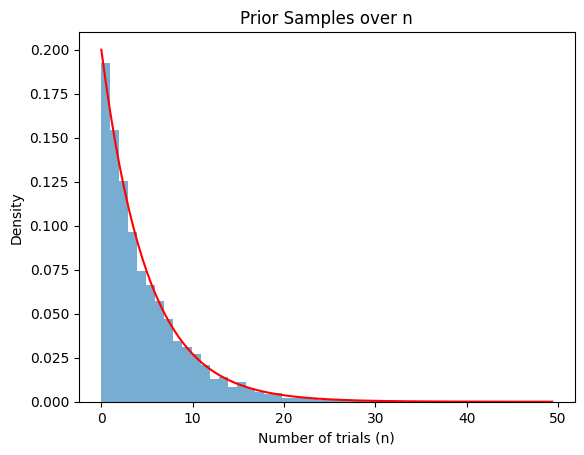

In [33]:
# Plot the PDF of the prior over $n$
plt.hist(
    prior_samples_n,
    bins=50,
    density=True,
    alpha=0.6
)
# Plot the true prior
x = np.linspace(0, prior_samples_n.max(), 200)
plt.plot(
    x,
    prior_dist_n.pdf(x),
    color='red',
    label='Exponential Prior on $n$'
)
plt.xlabel('Number of trials (n)')
plt.ylabel('Density')
plt.title('Prior Samples over n')
plt.show()

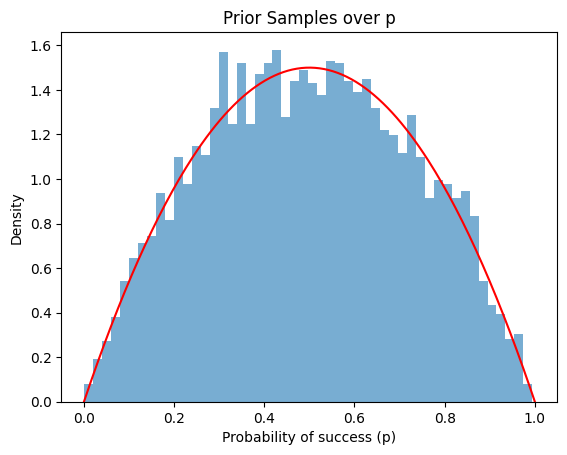

In [34]:
# Plot the PDF of the prior over p
plt.hist(
    prior_samples_p,
    bins=50,
    density=True,
    alpha=0.6
)
# Plot the true prior
x = np.linspace(0, 1, 200)
plt.plot(
    x,
    prior_dist_p.pdf(x),
    color='red',
    label='Beta Prior on $p$'
)
plt.xlabel('Probability of success (p)')
plt.ylabel('Density')
plt.title('Prior Samples over p')
plt.show()

In [35]:
# Compute the log-likelihood of the observed data, for each prior sample
log_likelihoods = np.array(
    [np.sum(likelihood_dist.logpmf(data, prior_sample_n, prior_sample_p)) for prior_sample_n, prior_sample_p in zip(prior_samples_n, prior_samples_p)]
)

# Marginal log-probability of the data
log_weights = log_likelihoods - logsumexp(log_likelihoods)

# Make sure posterior_samples is a valid probability distribution
assert np.isclose(np.sum(np.exp(log_weights)), 1)

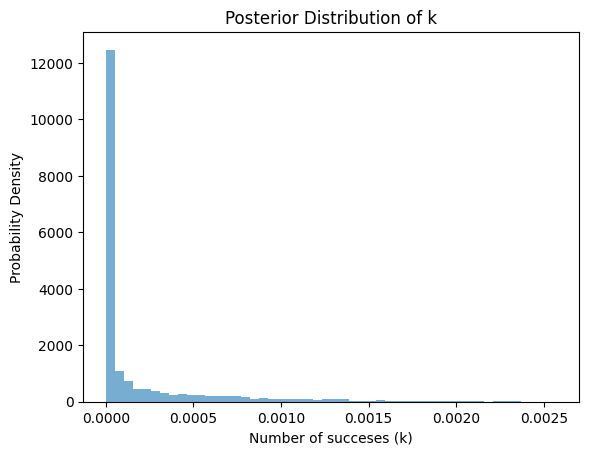

In [36]:
# Plot the PDF of the posterior samples
plt.hist(
    np.exp(log_weights),
    bins=50,
    density=True,
    alpha=0.6
)
plt.xlabel('Number of succeses (k)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of k')
plt.show()

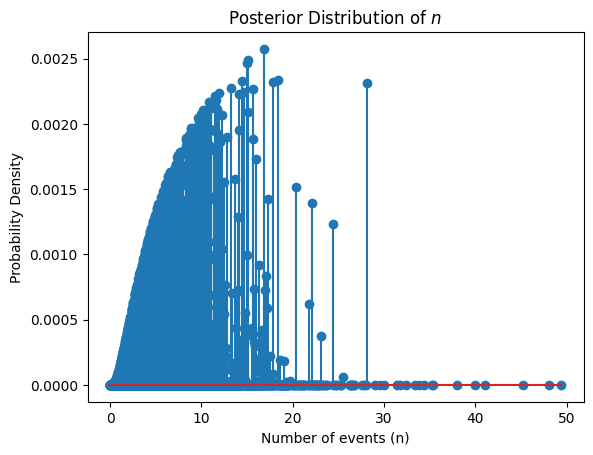

In [37]:
# Plot the posterior distribution, by using the samples and their weights (log-likelihoods), via a stem-plot
plt.stem(
    prior_samples_n,
    np.exp(log_weights),
)
plt.xlabel('Number of events (n)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of $n$')
plt.show()

In [38]:
# Calculate the posterior mean and variance of $n$, using the weighted samples
posterior_mean_n = np.sum(prior_samples_n * np.exp(log_weights))
posterior_variance_n = np.sum((prior_samples_n - posterior_mean_n)**2 * np.exp(log_weights))

# Print the results
print(f"Posterior Mean of number of events: {posterior_mean_n}")
print(f"Posterior Variance of number of events: {posterior_variance_n}")

Posterior Mean of number of events: 6.1531096255301785
Posterior Variance of number of events: 14.393797968310906


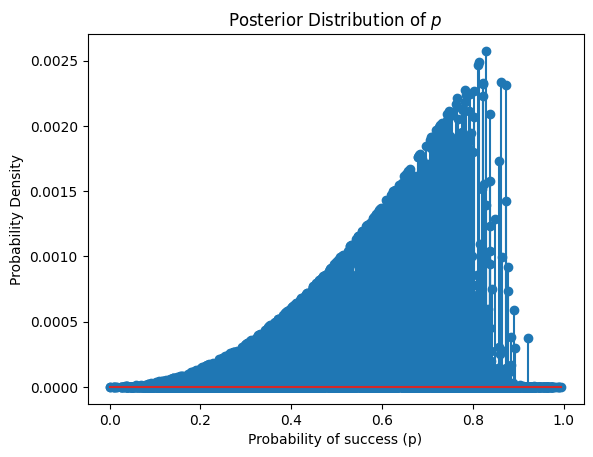

In [39]:
# Plot the posterior distribution of p, by using the samples and their weights (log-likelihoods), via a stem-plot
plt.stem(
    prior_samples_p,
    np.exp(log_weights),
)
plt.xlabel('Probability of success (p)')
plt.ylabel('Probability Density')
plt.title('Posterior Distribution of $p$')
plt.show()

In [40]:
# Calculate the posterior mean and variance of p, using the weighted samples
posterior_mean_p = np.sum(prior_samples_p * np.exp(log_weights))
posterior_variance_p = np.sum((prior_samples_p - posterior_mean_p)**2 * np.exp(log_weights))

# Print the results
print(f"Posterior Mean of probability of success: {posterior_mean_p}")
print(f"Posterior Variance of probability of success: {posterior_variance_p}")

Posterior Mean of probability of success: 0.5916684330640843
Posterior Variance of probability of success: 0.02173304998995832


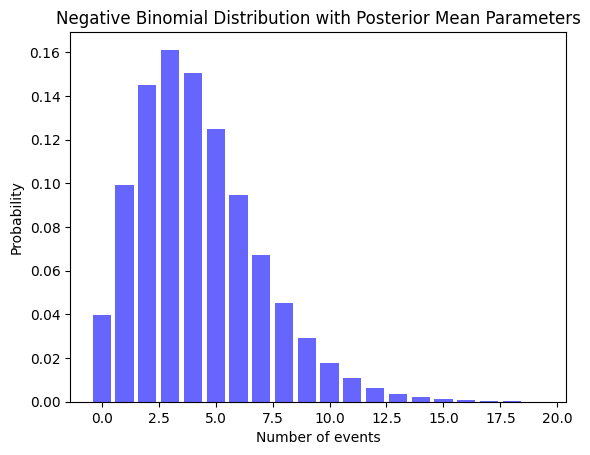

In [41]:
# Plot the negative binomial with the posterior mean parameters
x = np.arange(0, 20)
plt.bar(
    x,
    likelihood_dist.pmf(x, posterior_mean_n, posterior_mean_p),
    color='blue',
    alpha=0.6,
    align='center',
    label='Negative Binomial PMF'
)
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title('Negative Binomial Distribution with Posterior Mean Parameters')
plt.show()

In [42]:
# Calculate the expected value of the negative binomial distribution, using the posterior mean parameters
expected_value = posterior_mean_n * (1 - posterior_mean_p) / posterior_mean_p

# Print the result
print(f"Expected value of the Negative Binomial distribution: {expected_value}")

# Calculate the most likely value of the negative binomial distribution, using the posterior mean parameters
most_likely_value = (posterior_mean_n - 1) * (1 - posterior_mean_p) / posterior_mean_p

# Print the result
print(f"Most likely value of the Negative Binomial distribution: {most_likely_value}")

# Calculate the probability of observing a new data point greater than a threshold
threshold = 2

# Using the posterior distribution
probability_greater_than_threshold_posterior = 1 - likelihood_dist.cdf(threshold, posterior_mean_n, posterior_mean_p)

# Print the result
print(f"Probability of observing a new data point greater than {threshold}:")
print(f"Using the posterior distribution: {probability_greater_than_threshold_posterior}")

Expected value of the Negative Binomial distribution: 4.246481229207423
Most likely value of the Negative Binomial distribution: 3.5563454299705413
Probability of observing a new data point greater than 2:
Using the posterior distribution: 0.7156793606012197


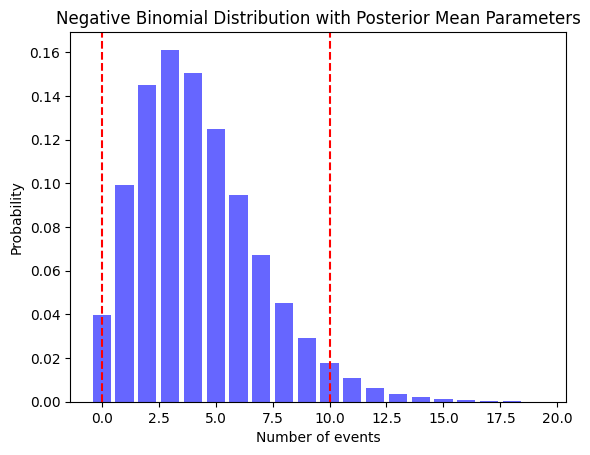

In [43]:
# Calculate the 95% credible interval
# Using the likelihood distribution with the posterior mean parameters
credible_interval_posterior = likelihood_dist.interval(0.95, posterior_mean_n, posterior_mean_p)

# Plot the 95% credible interval on the likelihood distribution
x = np.arange(0, 20)
plt.bar(
    x,
    likelihood_dist.pmf(x, posterior_mean_n, posterior_mean_p),
    color='blue',
    alpha=0.6,
    align='center',
    label='Negative Binomial PMF'
)
plt.axvline(
    x=credible_interval_posterior[0],
    color='red',
    linestyle='--',
    label='95% Credible Interval'
)
plt.axvline(
    x=credible_interval_posterior[1],
    color='red',
    linestyle='--'
)
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title('Negative Binomial Distribution with Posterior Mean Parameters')
plt.show()

# How do conclusions change depending on **the number of data-points observed, the prior, and the likelihood**?

Please change the number of data points, the prior, and the likelihood, and observe how the posterior distribution (and its sufficient statistics) change.